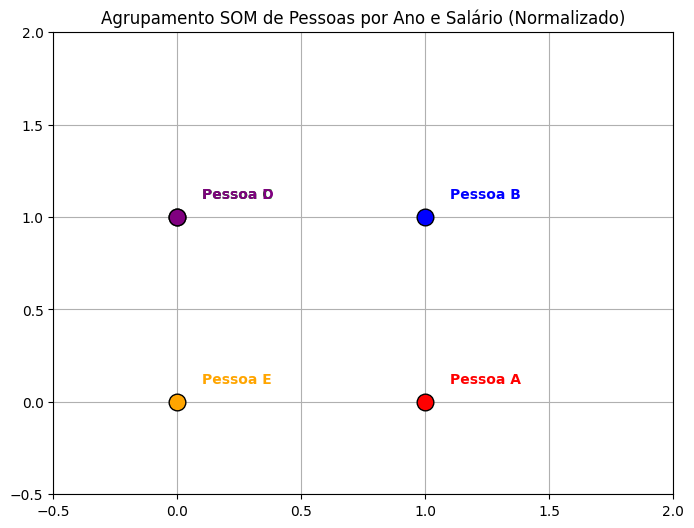

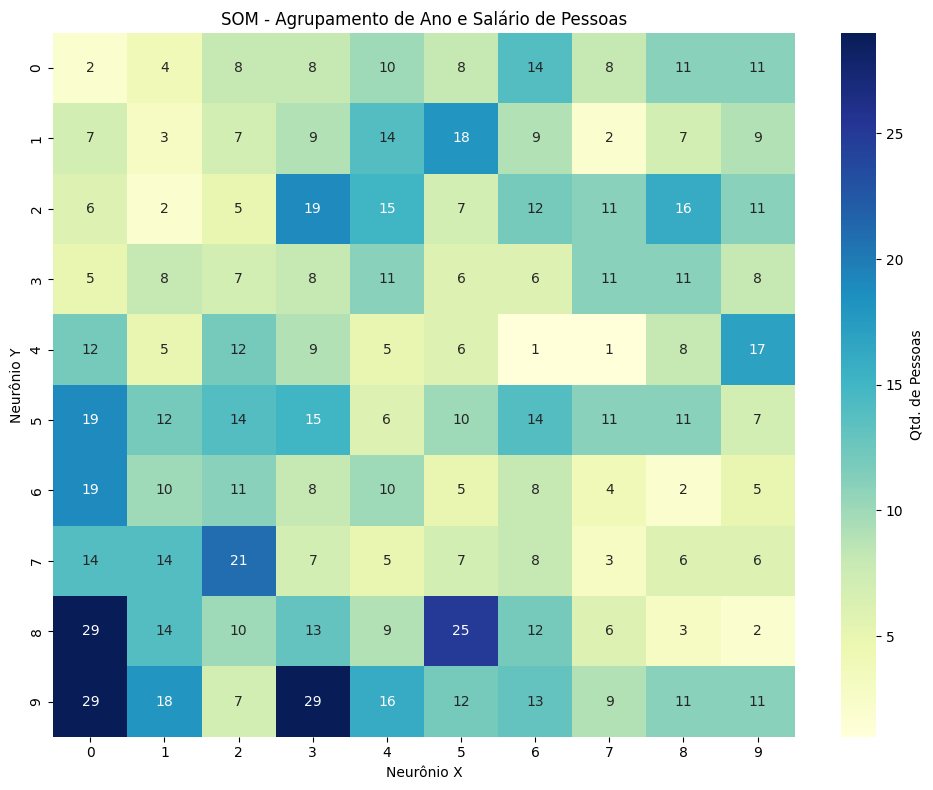

In [4]:
# Reimportar e reexecutar após reset de ambiente
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom

# Dados normalizados: ano e salário
dados = np.array([
    [0.1, 0.3],  # Pessoa A
    [0.2, 0.4],  # Pessoa B
    [0.8, 0.9],  # Pessoa C
    [0.85, 0.95],# Pessoa D
    [0.5, 0.5]   # Pessoa E
])

# Inicialização do SOM (mapa 2x2)
som = MiniSom(x=2, y=2, input_len=2, sigma=0.5, learning_rate=0.5)
som.random_weights_init(dados)
som.train(data=dados, num_iteration=100, verbose=False)

# Encontrar posições no mapa para cada dado
posicoes = np.array([som.winner(x) for x in dados])

# Plot do SOM
plt.figure(figsize=(8, 6))
cores = ['red', 'blue', 'green', 'purple', 'orange']
labels = ['Pessoa A', 'Pessoa B', 'Pessoa C', 'Pessoa D', 'Pessoa E']

for i, x in enumerate(dados):
    w = som.winner(x)
    plt.text(w[0]+0.1, w[1]+0.1, labels[i], color=cores[i], fontweight='bold')
    plt.plot(w[0], w[1], 'o', markerfacecolor=cores[i], markeredgecolor='k', markersize=12)

plt.xlim(-0.5, 2)
plt.ylim(-0.5, 2)
plt.title('Agrupamento SOM de Pessoas por Ano e Salário (Normalizado)')
plt.grid(True)
plt.show()


from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap, annot=True, fmt='g', cmap='YlGnBu', cbar_kws={'label': 'Qtd. de Pessoas'})
plt.title('SOM - Agrupamento de Ano e Salário de Pessoas')
plt.xlabel('Neurônio X')
plt.ylabel('Neurônio Y')
plt.tight_layout()
plt.show()

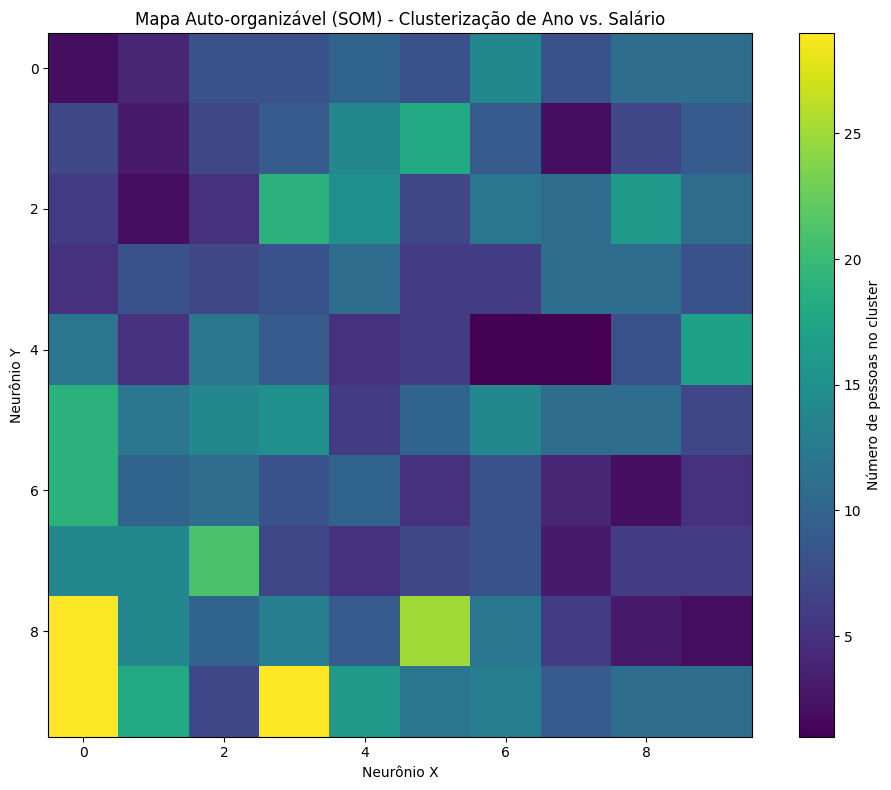

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler

# 1. Gerar dados fictícios de 1000 pessoas
np.random.seed(42)
anos = np.random.randint(1960, 2005, 1000)         # Anos de nascimento entre 1960 e 2005
salarios = np.random.normal(loc=5000, scale=1500, size=1000)  # Salários médios em torno de R$5000

# Corrigir possíveis valores negativos
salarios = np.clip(salarios, 1500, None)

# 2. Organizar em um array e normalizar
dados = np.column_stack((anos, salarios))
scaler = MinMaxScaler()
dados_normalizados = scaler.fit_transform(dados)

# 3. Criar e treinar o SOM
som = MiniSom(x=10, y=10, input_len=2, sigma=1.0, learning_rate=0.5)
som.random_weights_init(dados_normalizados)
som.train(dados_normalizados, num_iteration=1000)

# 4. Mapear os dados para suas posições no SOM
posicoes = np.array([som.winner(d) for d in dados_normalizados])
heatmap = np.zeros((10, 10))

# Contar quantos dados caíram em cada neurônio
for pos in posicoes:
    heatmap[pos[0], pos[1]] += 1

# 5. Plotar o mapa com número de pontos por neurônio
plt.figure(figsize=(10, 8))
plt.imshow(heatmap, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Número de pessoas no cluster')
plt.title("Mapa Auto-organizável (SOM) - Clusterização de Ano vs. Salário")
plt.xlabel("Neurônio X")
plt.ylabel("Neurônio Y")
plt.tight_layout()
plt.show()


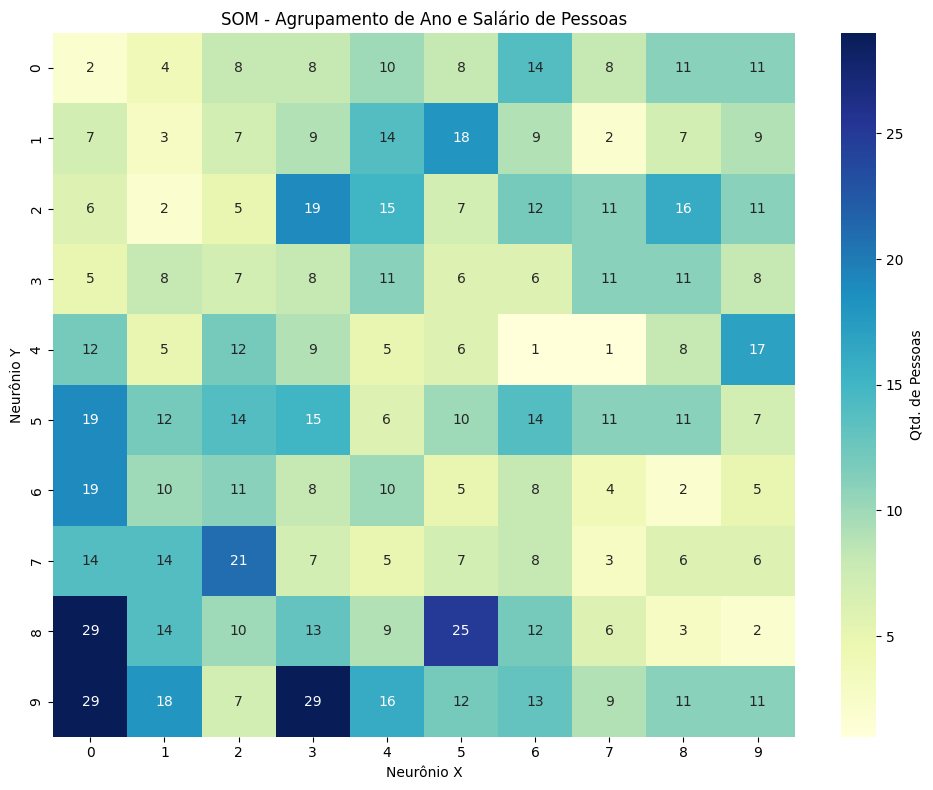

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap, annot=True, fmt='g', cmap='YlGnBu', cbar_kws={'label': 'Qtd. de Pessoas'})
plt.title('SOM - Agrupamento de Ano e Salário de Pessoas')
plt.xlabel('Neurônio X')
plt.ylabel('Neurônio Y')
plt.tight_layout()
plt.show()

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom

# Dados normalizados fornecidos
dados = np.array([
    [0.1, 0.3],  # Pessoa A
    [0.2, 0.4],  # Pessoa B
    [0.8, 0.9],  # Pessoa C
    [0.85, 0.95],# Pessoa D
    [0.5, 0.5]   # Pessoa E
])
pessoas = ['A', 'B', 'C', 'D', 'E']

# Criar um SOM 1D com 2 clusters (2 neurônios lado a lado)
som = MiniSom(x=2, y=1, input_len=2, sigma=0.5, learning_rate=0.5, neighborhood_function='gaussian', random_seed=42)
som.random_weights_init(dados)

# Pesos iniciais
pesos_iniciais = som.get_weights().copy()

# Treinar com 1 época manualmente, mostrando atualizações
atualizacoes = []
for i, x in enumerate(dados):
    vencedor = som.winner(x)
    peso_antigo = som.get_weights().copy()
    som.update(x, vencedor, i, len(dados))  # update manual
    peso_novo = som.get_weights().copy()
    atualizacoes.append((pessoas[i], x, vencedor, peso_antigo, peso_novo))

# Associar cada pessoa ao cluster final
cluster_final = {pessoas[i]: som.winner(x) for i, x in enumerate(dados)}

# Organizar os dados para exibição
resultado = []
for pessoa, entrada, vencedor, peso_ant, peso_nov in atualizacoes:
    resultado.append({
        'Pessoa': pessoa,
        'Entrada': entrada,
        'Vencedor': vencedor,
        'Pesos Antes': peso_ant.copy(),
        'Pesos Depois': peso_nov.copy()
    })

import pandas as pd


